In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
from hebbian_neurons import *

import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [63]:
n = Neuron(activation="linear")

input_val = np.random.randn()
print(f"Input: {input_val}")
print(f"{n}")
print(f"Neuron activation: {n.forward(input_val)}")

Input: -0.1568854072154326
Neuron: () 
Neuron activation: -0.1568854072154326


In [79]:
neurons_layer = [2, 2]

inputs = np.array([1, 1])
net = Network(neurons_layer, activation="linear")
print(net)

net.forward(inputs)
print(net.weights)

Network: 
Neuron: (0,0) Neuron: (0,1) 
Weight 0 [[1. 1.]
 [1. 1.]]
Neuron: (1,0) Neuron: (1,1) 
First layer Activations: [1. 1.]
Layer {l} activation:  [2. 2.]
[array([[0.994   , 0.994   ],
       [0.994024, 0.994024]])]


In [180]:
# Generate Data
mean = np.zeros(inputs.size)
cov = np.array([[1, 0], [0, 1]])
num_samples = 100000

print("Cov: \n", cov)
data = np.random.multivariate_normal(mean, cov, num_samples)

Cov: 
 [[1 0]
 [0 1]]


In [189]:
# Train the network
net = Network(neurons_layer, activation="linear")

print("Initial weight: \n", net.weights)
tmp_weights = np.zeros((len(data), net.weights[0].shape[0], net.weights[0].shape[1]))
for i, d in enumerate(data):
    net.forward(d)
    tmp_weights[i] = net.weights[0].copy()

print("Final weight: \n", net.weights)

Initial weight: 
 [array([[1., 1.],
       [1., 1.]])]
Final weight: 
 [array([[ 0.99970346,  0.02435161],
       [-0.02435161,  0.99970346]])]


In [182]:
def weightToArrow(weight):
    return (0, 0, weight[0], weight[1])

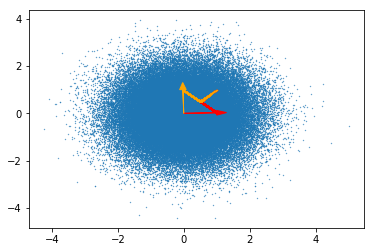

In [193]:
plt.scatter(data[:, 0], data[:, 1], s=0.1)
# plt.arrow(*weightToArrow(net.weights[0][:, 0]), head_width=np.linalg.norm(w) / 5, color='r')
# plt.arrow(*weightToArrow(net.weights[0][:, 1]), head_width=np.linalg.norm(w) / 5, color='orange')

plt.arrow(*weightToArrow(net.weights[0][0, :]), head_width=np.linalg.norm(w) / 5, color='r')
plt.arrow(*weightToArrow(net.weights[0][1, :]), head_width=np.linalg.norm(w) / 5, color='orange')

plt.scatter(tmp_weights[:, 0, 0], tmp_weights[:, 0, 1], s=0.1, color="r")
plt.scatter(tmp_weights[:, 1, 0], tmp_weights[:, 1, 1], s=0.1, color="orange")

# plt.arrow(*weightToArrow(cov[1, :]), head_width=np.linalg.norm(w) / 5, color='k')
# plt.arrow(*weightToArrow(cov[0, :]), head_width=np.linalg.norm(w) / 5, color='k')
plt.savefig("pca_neurons.png")
plt.show()